In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [5]:
#load the csv data to a pandas dataframe
df=pd.read_excel('tarp_dataset.xlsx')

In [6]:
#printing the 10 five rows of a data frame
df.head(10)

,Names,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
0,barjraj,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Minimal depression
1,ramdin verma,Several days,More than half the days,Several days,Several days,Not at all,Not at all,Not at all,Several days,Nearly every day,Mild depression
2,sharat chandran,Several days,More than half the days,More than half the days,Several days,More than half the days,Several days,Several days,Several days,Several days,Moderate depression
3,birender mandal,Several days,Several days,Several days,Several days,Several days,Several days,Several days,Not at all,Several days,Mild depression
4,amit,Several days,Several days,Nearly every day,Nearly every day,More than half the days,Not at all,Not at all,Several days,Not at all,Moderate depression
5,kushal,Nearly every day,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Minimal depression
6,kasid,Several days,Several days,Nearly every day,Nearly every day,Several days,Not at all,Not at all,Several days,Not at all,Moderate depression
7,shiv prakash,More than half the days,Nearly every day,Nearly every day,Several days,More than half the days,Nearly every day,More than half the days,More than half the days,Several days,Moderately severe depression
8,vikram singh,Several days,Not at all,Several days,Several days,Not at all,Several days,Not at all,Several days,Not at all,Mild depression
9,sanjay,More than half the days,More than half the days,Several days,Several days,More than half the days,Several days,Not at all,Several days,Not at all,Moderate depression


In [7]:
#printing the last 10 rows of a dataset
df.tail(10)


,Names,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
2463,raju,Nearly every day,Not at all,Several days,Several days,Not at all,Not at all,Nearly every day,Several days,Several days,Moderate depression
2464,sandeep,Several days,Not at all,Nearly every day,Several days,Not at all,Not at all,Several days,Several days,Not at all,Mild depression
2465,aatif,Not at all,Several days,Not at all,Not at all,Not at all,More than half the days,More than half the days,Several days,Not at all,Mild depression
2466,jahid,Nearly every day,More than half the days,Nearly every day,More than half the days,Several days,Several days,Nearly every day,More than half the days,Not at all,Moderately severe depression
2467,anil,Nearly every day,Several days,Several days,Several days,More than half the days,More than half the days,More than half the days,More than half the days,More than half the days,Moderately severe depression
2468,amit sharma,Several days,Several days,Nearly every day,Nearly every day,Several days,More than half the days,Several days,Nearly every day,Not at all,Moderately severe depression
2469,ankit kumar,More than half the days,Nearly every day,More than half the days,More than half the days,Nearly every day,More than half the days,Not at all,Nearly every day,More than half the days,Moderately severe depression
2470,mho najim,Nearly every day,Not at all,More than half the days,Nearly every day,Not at all,Several days,Several days,Nearly every day,More than half the days,Moderately severe depression
2471,ridhakaran sharma,More than half the days,More than half the days,Not at all,Not at all,Nearly every day,Several days,Nearly every day,Nearly every day,More than half the days,Moderately severe depression
2472,babulal yadav,Nearly every day,Several days,Not at all,Several days,Not at all,Several days,Not at all,Several days,Several days,Mild depression


In [8]:
#number of rows and cols in a dataset 
df.shape

(2473, 11)

Dropping Unnecessary Columns


In [9]:
df=df.drop('Names',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 10 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Little interest or pleasure in doing things?                                                      2473 non-null   object
 1   Feeling down, depressed, or hopeless?                                                             2473 non-null   object
 2   Trouble falling or staying asleep, or sleeping too much?                                          2473 non-null   object
 3   Feeling tired or having little energy?                                                            2473 non-null   object
 4   Poor appetite or overeating?                                                                      2473 non-null   object
 5   Feelin

In [11]:
#checking for missing values
df.isnull()

,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2468,False,False,False,False,False,False,False,False,False,False
2469,False,False,False,False,False,False,False,False,False,False
2470,False,False,False,False,False,False,False,False,False,False
2471,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Little interest or pleasure in doing things?                                                        0
Feeling down, depressed, or hopeless?                                                               0
Trouble falling or staying asleep, or sleeping too much?                                            0
Feeling tired or having little energy?                                                              0
Poor appetite or overeating?                                                                        0
Feeling bad about yourself - or that you are a failure or have let yourself or your family down?    0
Trouble concentrating on things, such as reading the newspaper or watching television?              0
Moving                                                                                              0
Thoughts that you would be better off dead, or of hurting yourself in some way?                     0
Depression                                                                        

In [13]:
df.describe()

,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
count,2473,2473,2473,2473,2473,2473,2473,2473,2473,2473
unique,4,4,4,4,4,4,4,4,4,5
top,Several days,Several days,Several days,Not at all,Not at all,Several days,Not at all,Several days,Not at all,Moderate depression
freq,677,700,658,649,680,636,697,660,697,1147


SMOTE


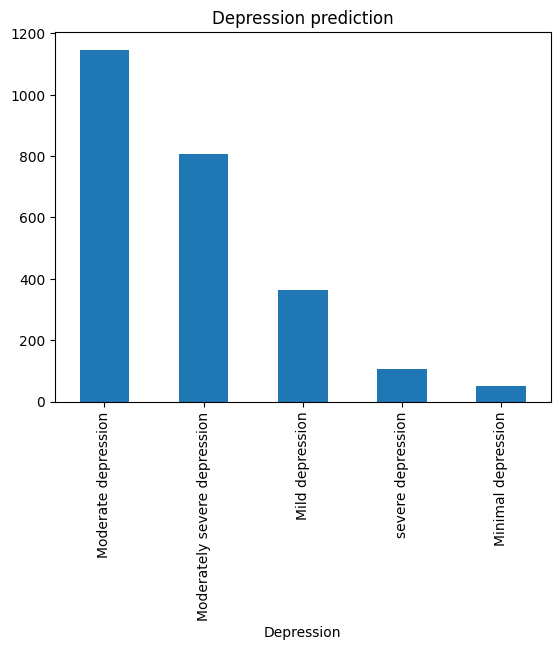

In [14]:
df["Depression"].value_counts().plot(kind='bar',
                                   title='Depression prediction')
plt.show()

In [15]:
#tranforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
for column in df:
    df[column] = labelencoder.fit_transform(df[column]) 
df.head(10)

,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
0,3,2,2,2,2,2,2,2,2,1
1,3,0,3,3,2,2,2,3,1,0
2,3,0,0,3,0,3,3,3,3,2
3,3,3,3,3,3,3,3,2,3,0
4,3,3,1,1,0,2,2,3,2,2
5,1,2,2,2,2,2,2,2,2,1
6,3,3,1,1,3,2,2,3,2,2
7,0,1,1,3,0,1,0,0,3,3
8,3,2,3,3,2,3,2,3,2,0
9,0,0,3,3,0,3,2,3,2,2


In [16]:
from imblearn.over_sampling import SMOTE
# Separate features (X) and target (y)
X = df.drop('Depression', axis=1)
y = df['Depression']

# Initialize SMOTE with default parameters
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df1 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Depression')], axis=1)

# Check the shape of the resampled dataset
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", df1.shape)

Original dataset shape: (2473, 9) (2473,)
Resampled dataset shape: (5735, 10)


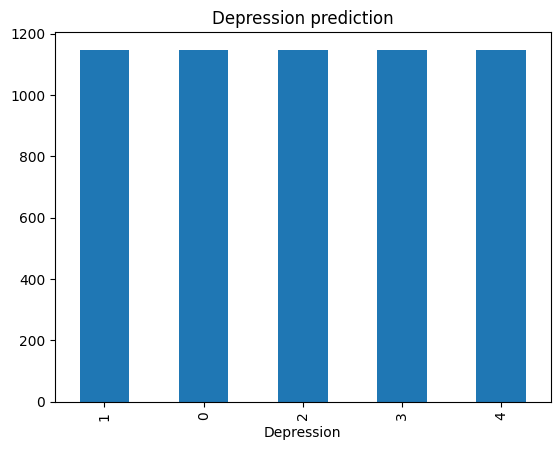

In [17]:
df1["Depression"].value_counts().plot(kind='bar',
                                   title='Depression prediction')
plt.show()

In [18]:
df1.head(10)

,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?","Trouble falling or staying asleep, or sleeping too much?",Feeling tired or having little energy?,Poor appetite or overeating?,Feeling bad about yourself - or that you are a failure or have let yourself or your family down?,"Trouble concentrating on things, such as reading the newspaper or watching television?",Moving,"Thoughts that you would be better off dead, or of hurting yourself in some way?",Depression
0,3,2,2,2,2,2,2,2,2,1
1,3,0,3,3,2,2,2,3,1,0
2,3,0,0,3,0,3,3,3,3,2
3,3,3,3,3,3,3,3,2,3,0
4,3,3,1,1,0,2,2,3,2,2
5,1,2,2,2,2,2,2,2,2,1
6,3,3,1,1,3,2,2,3,2,2
7,0,1,1,3,0,1,0,0,3,3
8,3,2,3,3,2,3,2,3,2,0
9,0,0,3,3,0,3,2,3,2,2


In [19]:
#splitting the features and target 
#as we are dropping the colums so 1 if row 0
X=df1.drop(columns='Depression',axis=1)
Y=df1['Depression']

In [20]:
print(X)

      Little interest or pleasure in doing things?  \
0                                                3   
1                                                3   
2                                                3   
3                                                3   
4                                                3   
...                                            ...   
5730                                             2   
5731                                             1   
5732                                             1   
5733                                             0   
5734                                             1   

      Feeling down, depressed, or hopeless?  \
0                                         2   
1                                         0   
2                                         0   
3                                         3   
4                                         3   
...                                     ...   
5730                  

In [21]:
print(Y)

0       1
1       0
2       2
3       0
4       2
       ..
5730    4
5731    4
5732    4
5733    4
5734    4
Name: Depression, Length: 5735, dtype: int32


In [22]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X , Y, test_size=0.20, stratify=Y,  random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(5735, 9) (4588, 9) (1147, 9)


MODEL TRAINING


LOGISTIC REGRESSION


In [24]:
model=LogisticRegression()

In [25]:
#training the logistic regression 
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
#accuracy score
X_Train_predection=model.predict(X_train)
training_accuracy=accuracy_score(X_Train_predection,Y_train)

In [27]:
print("accuracy on Training data :",training_accuracy)

accuracy on Training data : 0.5677855274629469


In [28]:
#accuracy on test data
X_Test_predection=model.predict(X_test)
testing_accuracy=accuracy_score(X_Test_predection,Y_test)

In [29]:
print("accuracy on testing data : ",testing_accuracy)

accuracy on testing data :  0.5632083696599826


Hybrid Model (Decision Tree And Ensemble Begging Classifier)


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Create a base model
base_model = DecisionTreeClassifier()

# Create an Ensemble Bagging Classifier with 10 base models
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# Assuming X_train, Y_train, X_test, and Y_test are already defined
# Train the model on your data
bagging_model.fit(X_train, Y_train)

# Make predictions on your test data
y_pred = bagging_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 89.01%


In [36]:
import pickle
# train the bagging_model
# Save the model as a pickle file
with open('bagging_model1.pickle', 'wb') as f:
    pickle.dump(bagging_model, f)
